In [1620]:
#IMPRTING LIBRARIES TO GET STARTED


In [1621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1622]:
#READING DATASET

In [1623]:
train = pd.read_csv('titanic_train.csv')

In [1624]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1625]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1626]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

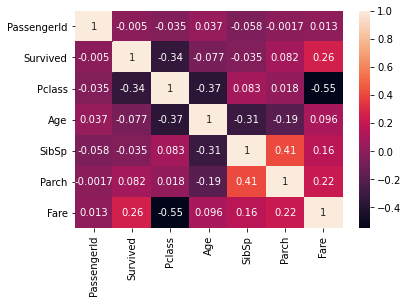

In [1627]:
sns.heatmap(train.corr(),annot=True)

In [1628]:
train.drop('Parch',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)


<AxesSubplot:xlabel='Survived', ylabel='count'>

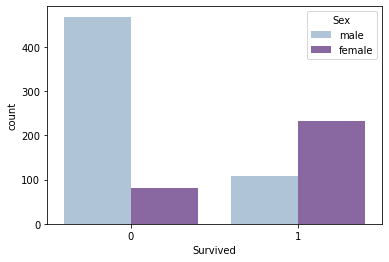

In [1629]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='BuPu')

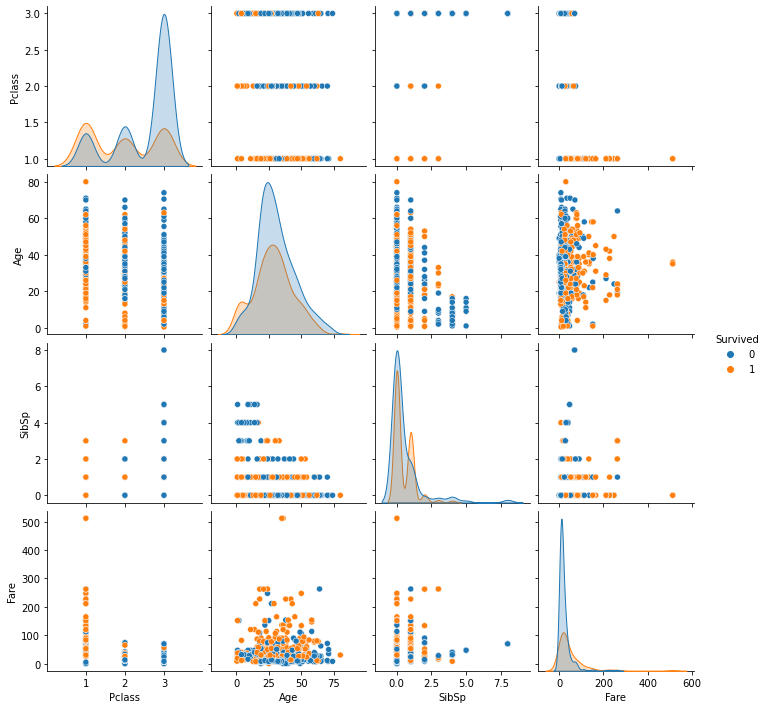

In [1630]:
sns.pairplot(train,hue="Survived")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

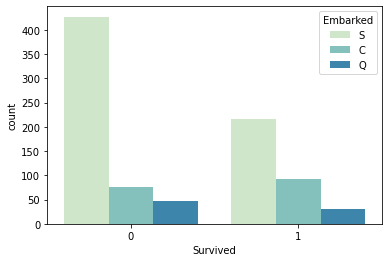

In [1631]:
sns.countplot(x='Survived',hue='Embarked',data=train,palette='GnBu')

In [1632]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

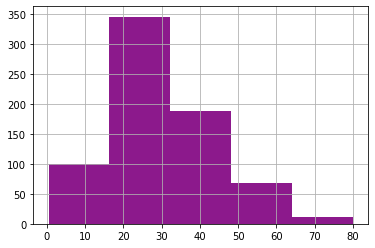

In [1633]:
train['Age'].hist(bins=5,color='purple',alpha=0.9)

In [1634]:
#data cleaning


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

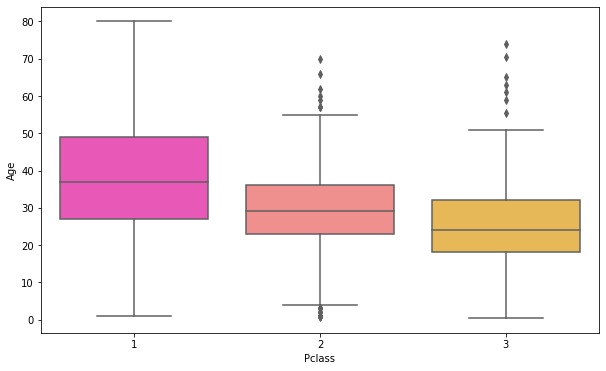

In [1635]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass',y='Age',data=train,palette='spring')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

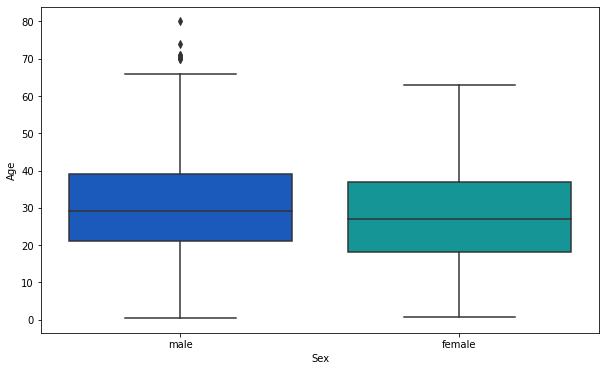

In [1636]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex',y='Age',data=train,palette='winter')

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

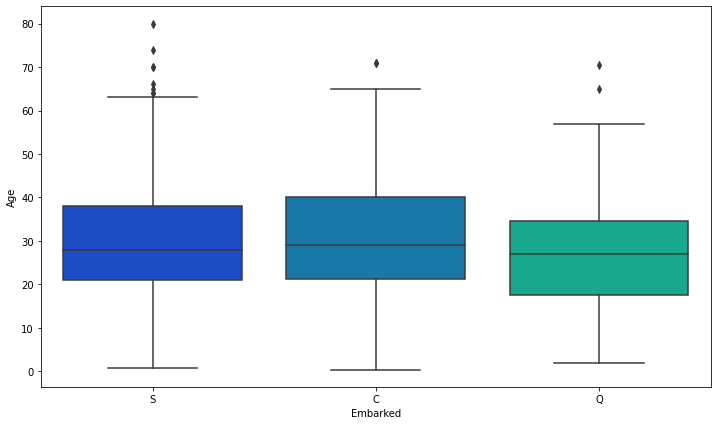

In [1637]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Embarked',y='Age',data=train,palette='winter')

In [1638]:
def _age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 41
        
            

        elif Pclass == 2:
            return 30

        else:
            return 27

    else:
        return Age

In [1639]:
train['Age'] = train[['Age','Pclass']].apply(_age,axis=1)

<AxesSubplot:>

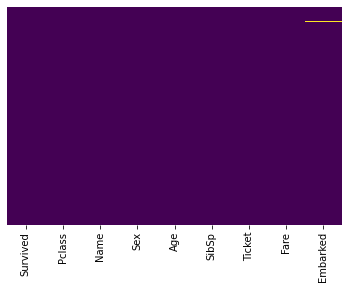

In [1640]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1641]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [1642]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [1643]:
train = pd.concat([train,sex,embark],axis=1)

In [1644]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [1645]:
from sklearn.model_selection import train_test_split

In [1646]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=42)

In [1647]:
from sklearn.linear_model import LogisticRegression

In [1648]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [1649]:
pred = logmodel.predict(X_test)

In [1650]:
from sklearn.metrics import classification_report

In [1651]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

